## Trabalhando com Big Data - 25 Milhões de Registros
fonte: https://grouplens.org/datasets/movielens/

In [1]:
import pandas as pd

In [2]:
!pwd

/Users/valencar/Dropbox/AULAS-REMOTAS/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/Python-Para-Analise-de-Dados/NOITE


In [3]:
!ls -ilah /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m

total 5212696
8852112067 drwxr-xr-x@ 16 valencar  staff   512B Feb  3 04:05 .
8753341664 drwxr-xr-x@ 34 valencar  staff   1.1K Feb  3 10:49 ..
8852135013 -rw-r--r--@  1 valencar  staff   6.0K Dec 21 16:32 .DS_Store
8852112072 -rw-r--r--@  1 valencar  staff    10K Oct 17  2016 README.txt
8852115885 -rw-r--r--@  1 valencar  staff   1.1M Dec 20 17:50 filmes-ratings.csv
8860047286 -rw-r--r--@  1 valencar  staff   277M Feb  3 01:59 filmes.pbix
8852133601 -rw-r--r--@  1 valencar  staff    46K Dec 20 21:38 filmes2.csv
8859960005 -rw-r-----@  1 valencar  staff   1.1G Dec 20 22:20 filmes4.csv
8852142504 -rw-r--r--@  1 valencar  staff   287M Dec 21 05:20 filmes4.csv.zip
8852112073 -rw-r--r--@  1 valencar  staff   309M Oct 17  2016 genome-scores.csv
8852112070 -rw-r--r--@  1 valencar  staff    18K Oct 17  2016 genome-tags.csv
8852112068 -rw-r--r--@  1 valencar  staff   557K Oct 17  2016 links.csv
8852445227 -rw-r--r--@  1 valencar  staff   2.3K Dec 24 23:22 ml-20m.sql
8852112074 -rw-r--r--@  1 va

In [4]:
!head /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/movies.csv

In [5]:
url = '/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m' + '/' + 'ratings.csv'
url

'/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/ratings.csv'

In [6]:
%time

dfratings = pd.read_csv(url)
print('total de registros: {:,d}'.format(len(dfratings)))

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs
total de registros: 20,000,263


In [7]:
dfratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [8]:
url = '/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m' + '/' + 'movies.csv'
url

'/Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/movies.csv'

In [9]:
%time

dfmovies = pd.read_csv(url)
print('total de registros: {:,d}'.format(len(dfmovies)))

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 7.15 µs
total de registros: 27,278


In [10]:
dfmovies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
%%time

dfdrama_acao = dfmovies[ dfmovies.genres.str.contains('Drama') |  dfmovies.genres.str.contains('Action') ]
print('total de registros: {:,d}'.format(len(dfdrama_acao)))
dfdrama_acao.head()

total de registros: 15,661
CPU times: user 24.3 ms, sys: 3.49 ms, total: 27.8 ms
Wall time: 65.3 ms


,movieId,title,genres
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,6,Heat (1995),Action|Crime|Thriller
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller
10,11,"American President, The (1995)",Comedy|Drama|Romance


# Obter todos os generos

In [12]:
genres = 'Comedy|Drama|Romance'
generos = genres.split('|')
generos

['Comedy', 'Drama', 'Romance']

In [13]:
%%time

set_generos = set()

for index, row in dfmovies.iterrows(): 
    generos = row['genres'].split('|')
    set_generos.update(generos)
    
generos = list(set_generos)
print('numero de generos',len(generos))
print(generos)

numero de generos 20
['Romance', 'Western', 'Crime', 'Comedy', 'War', 'Fantasy', 'Sci-Fi', 'Adventure', 'Thriller', 'Action', 'Animation', 'Documentary', 'Drama', 'IMAX', 'Horror', 'Children', '(no genres listed)', 'Mystery', 'Musical', 'Film-Noir']
CPU times: user 958 ms, sys: 13.4 ms, total: 972 ms
Wall time: 1.23 s


## Criando colunas Genero - individuais

In [14]:
%%time

for genero in generos:
    dfmovies[genero] = False
    
dfmovies.head()

CPU times: user 7.4 ms, sys: 2.73 ms, total: 10.1 ms
Wall time: 8.88 ms


,movieId,title,genres,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,...,Animation,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
%%time 

for index, row in dfmovies.iterrows(): 
    generos = row['genres'].split('|')
    for genero in generos:
        dfmovies.at[index, genero] = True
    
dfmovies.head()

CPU times: user 1.61 s, sys: 21.8 ms, total: 1.63 s
Wall time: 1.68 s


,movieId,title,genres,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,...,Animation,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,False,False,False,True,False,True,False,...,True,False,False,False,False,True,False,False,False,False
1,2,Jumanji (1995),Adventure|Children|Fantasy,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,3,Grumpier Old Men (1995),Comedy|Romance,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),Comedy,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
dfmovies.Drama.value_counts()

False    13934
True     13344
Name: Drama, dtype: int64

In [17]:
del dfmovies['genres']
dfmovies.head()

,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Animation,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir
0,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
1,2,Jumanji (1995),False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
2,3,Grumpier Old Men (1995),True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),True,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# criar estatistica de generos

In [18]:
generos = list(set_generos)
print('numero de generos',len(generos))
print(generos)

numero de generos 20
['Romance', 'Western', 'Crime', 'Comedy', 'War', 'Fantasy', 'Sci-Fi', 'Adventure', 'Thriller', 'Action', 'Animation', 'Documentary', 'Drama', 'IMAX', 'Horror', 'Children', '(no genres listed)', 'Mystery', 'Musical', 'Film-Noir']


In [19]:
dfmovies.Horror.value_counts()

False    24667
True      2611
Name: Horror, dtype: int64

In [20]:
for genero in generos:
    count_genero = dfmovies[genero].sum()
    print(genero, count_genero)
    break

Romance 4127


In [21]:
dict_genero = {}
for genero in generos:
    count_genero = dfmovies[genero].sum()
    dict_genero[genero] = count_genero

dict_genero

{'Romance': 4127,
 'Western': 676,
 'Crime': 2939,
 'Comedy': 8374,
 'War': 1194,
 'Fantasy': 1412,
 'Sci-Fi': 1743,
 'Adventure': 2329,
 'Thriller': 4178,
 'Action': 3520,
 'Animation': 1027,
 'Documentary': 2471,
 'Drama': 13344,
 'IMAX': 196,
 'Horror': 2611,
 'Children': 1139,
 '(no genres listed)': 246,
 'Mystery': 1514,
 'Musical': 1036,
 'Film-Noir': 330}

In [22]:
df_genero_cont = pd.DataFrame.from_dict(dict_genero, orient='index').reset_index()
df_genero_cont

,index,0
0,Romance,4127
1,Western,676
2,Crime,2939
3,Comedy,8374
4,War,1194
5,Fantasy,1412
6,Sci-Fi,1743
7,Adventure,2329
8,Thriller,4178
9,Action,3520


In [23]:
df_genero_cont.columns = ['genero', 'total']
df_genero_cont

,genero,total
0,Romance,4127
1,Western,676
2,Crime,2939
3,Comedy,8374
4,War,1194
5,Fantasy,1412
6,Sci-Fi,1743
7,Adventure,2329
8,Thriller,4178
9,Action,3520


In [24]:
dfo = df_genero_cont.sort_values(by='total', ascending=False).reset_index(drop=True)
dfo

,genero,total
0,Drama,13344
1,Comedy,8374
2,Thriller,4178
3,Romance,4127
4,Action,3520
5,Crime,2939
6,Horror,2611
7,Documentary,2471
8,Adventure,2329
9,Sci-Fi,1743


# Capturando o ano

In [25]:
dfmovies.head()

,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Animation,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir
0,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,True,False,False,False,False,True,False,False,False,False
1,2,Jumanji (1995),False,False,False,False,False,True,False,True,...,False,False,False,False,False,True,False,False,False,False
2,3,Grumpier Old Men (1995),True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,Waiting to Exhale (1995),True,False,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,5,Father of the Bride Part II (1995),False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
x = 'Father of the Bride Part II (1995)'
x.find(')')

33

In [27]:
type(x)

str

In [28]:
x = 'Father of the Bride Part II'
x.find(')')

-1

In [29]:
import numpy as np

dfmovies['ano'] = dfmovies.title.apply(lambda x : x.split('(')[1] if x.find(')') != -1  else np.nan)
dfmovies.head()

,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir,ano
0,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995)
1,2,Jumanji (1995),False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995)
2,3,Grumpier Old Men (1995),True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995)
3,4,Waiting to Exhale (1995),True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1995)
4,5,Father of the Bride Part II (1995),False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995)


In [30]:
dfmovies['ano'] = dfmovies.ano.apply(lambda x : x.replace(')', '') if type(x) == str else x)
dfmovies.head()

,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir,ano
0,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995
1,2,Jumanji (1995),False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995
2,3,Grumpier Old Men (1995),True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
3,4,Waiting to Exhale (1995),True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1995
4,5,Father of the Bride Part II (1995),False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


In [31]:
print(dfmovies.ano.value_counts())

2013                         888
2009                         878
2012                         852
2011                         831
2008                         778
                            ... 
Bienvenue chez les Rozes       1
L'horloger de Saint-Paul       1
Nyfes                          1
Nikutai no mon                 1
1891                           1
Name: ano, Length: 5341, dtype: int64


In [32]:
import re

x1 = '19993'
x2 = '1 2 title'
datas = r'^([1-9][0-9][0-9][0-9])'
#re.match(r'\d{4}', x)

if re.match(datas, x1):
    print('ok')
if re.match(datas, x2):
    print('ok nao data')

ok


In [33]:
datas = r'^([0-9][0-9][0-9][0-9])'

dfmovies['ano'] = dfmovies.title.apply(lambda x : x.split('(')[1] if x.find(')') != -1  else np.nan)
dfmovies['ano'] = dfmovies.ano.apply(lambda x : x.replace(')', '') if type(x) == str else x)

dfmovies['ano'] = dfmovies.ano.apply(lambda x : x[:4] if x is not np.nan and re.match(datas, x[:4]) else np.nan)
dfmovies.head()

,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir,ano
0,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995
1,2,Jumanji (1995),False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995
2,3,Grumpier Old Men (1995),True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
3,4,Waiting to Exhale (1995),True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1995
4,5,Father of the Bride Part II (1995),False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


In [34]:
dfmovies.ano.value_counts()

2013    902
2009    885
2012    872
2011    850
2008    785
       ... 
1913      1
1893      1
1901      1
1732      1
1891      1
Name: ano, Length: 118, dtype: int64

In [35]:
len(dfmovies.ano.unique())

119

In [36]:
print(dfmovies.ano.unique())

['1995' nan '1994' '1996' '1976' '1992' '1993' '1977' '1965' '1982' '1985'
 '1990' '1991' '1989' '1937' '1940' '1969' '1981' '1970' '1968' '1980'
 '1988' '1975' '1986' '1948' '1943' '1964' '1950' '1946' '1973' '1997'
 '1974' '1972' '1998' '1933' '1952' '1951' '1957' '1961' '1958' '1954'
 '1934' '1944' '1959' '1960' '1963' '1942' '1941' '1953' '1939' '1947'
 '1945' '1955' '1938' '1935' '1936' '1956' '1926' '1949' '1932' '1971'
 '1979' '1967' '1987' '1978' '1962' '1983' '1984' '1931' '1999' '1927'
 '1929' '1930' '1966' '1928' '1925' '1914' '2000' '1919' '1923' '1922'
 '1920' '1918' '1921' '2001' '1732' '2002' '2003' '1915' '1924' '2004'
 '1916' '1917' '2005' '2006' '1903' '2007' '2008' '2009' '2010' '1913'
 '2011' '1894' '1912' '2012' '1910' '1898' '1901' '1893' '2013' '1896'
 '1000' '2014' '1895' '2015' '1909' '1900' '1905' '1891']


In [37]:
dfmovies.ano.isnull().sum(), len(dfmovies.ano)

(5214, 27278)

In [38]:
dfanofilmes = dfmovies.ano.value_counts().to_frame().reset_index()
dfanofilmes.columns = ['ano', 'total_filmes']
dfanofilmes.head()

,ano,total_filmes
0,2013,902
1,2009,885
2,2012,872
3,2011,850
4,2008,785


In [39]:
dfanofilmes = dfanofilmes.sort_values(by='total_filmes', ascending=False).reset_index(drop=True)
dfanofilmes.head(10)

,ano,total_filmes
0,2013,902
1,2009,885
2,2012,872
3,2011,850
4,2008,785
5,2010,766
6,2007,724
7,2014,701
8,2006,672
9,2005,591


<AxesSubplot:xlabel='total_filmes', ylabel='ano'>

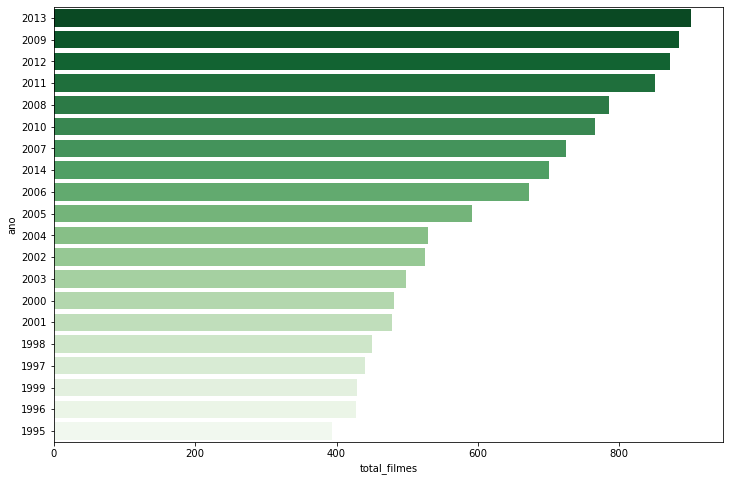

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

sns.barplot(x='total_filmes', y='ano', data=dfanofilmes[:20], palette='Greens_r')

# Join - inner join

In [41]:
dfratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,1112486027
1,1,29,3.5,1112484676
2,1,32,3.5,1112484819
3,1,47,3.5,1112484727
4,1,50,3.5,1112484580


In [42]:
dfmovies.head()

,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Documentary,Drama,IMAX,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir,ano
0,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995
1,2,Jumanji (1995),False,False,False,False,False,True,False,True,...,False,False,False,False,True,False,False,False,False,1995
2,3,Grumpier Old Men (1995),True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995
3,4,Waiting to Exhale (1995),True,False,False,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,1995
4,5,Father of the Bride Part II (1995),False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1995


In [43]:
%%time

dffilmes =  pd.merge(dfmovies, dfratings, left_on='movieId', right_on='movieId', how="inner")
print('total de registros: {:,d}'.format(len(dffilmes)))
dffilmes.head()

total de registros: 20,000,263
CPU times: user 3.25 s, sys: 1.55 s, total: 4.8 s
Wall time: 5.91 s


,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir,ano,userId,rating,timestamp
0,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,True,False,False,False,False,1995,3,4.0,944919407
1,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,True,False,False,False,False,1995,6,5.0,858275452
2,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,True,False,False,False,False,1995,8,4.0,833981871
3,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,True,False,False,False,False,1995,10,4.0,943497887
4,1,Toy Story (1995),False,False,False,True,False,True,False,True,...,False,True,False,False,False,False,1995,11,4.5,1230858821


In [44]:
dffilmes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000263 entries, 0 to 20000262
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movieId             int64  
 1   title               object 
 2   Romance             bool   
 3   Western             bool   
 4   Crime               bool   
 5   Comedy              bool   
 6   War                 bool   
 7   Fantasy             bool   
 8   Sci-Fi              bool   
 9   Adventure           bool   
 10  Thriller            bool   
 11  Action              bool   
 12  Animation           bool   
 13  Documentary         bool   
 14  Drama               bool   
 15  IMAX                bool   
 16  Horror              bool   
 17  Children            bool   
 18  (no genres listed)  bool   
 19  Mystery             bool   
 20  Musical             bool   
 21  Film-Noir           bool   
 22  ano                 object 
 23  userId              int64  
 24  rating              fl

In [45]:
dffilmes.sort_values(by='rating', ascending=False)[:15]

,movieId,title,Romance,Western,Crime,Comedy,War,Fantasy,Sci-Fi,Adventure,...,Horror,Children,(no genres listed),Mystery,Musical,Film-Noir,ano,userId,rating,timestamp
13420269,3578,Gladiator (2000),False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,2000,81601,5.0,1019193491
2163019,318,"Shawshank Redemption, The (1994)",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1994,74072,5.0,1005281633
2163010,318,"Shawshank Redemption, The (1994)",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1994,74057,5.0,953993667
16498925,6539,Pirates of the Caribbean: The Curse of the Bla...,False,False,False,True,False,True,False,True,...,False,False,False,False,False,False,2003,117595,5.0,1154219134
2163012,318,"Shawshank Redemption, The (1994)",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1994,74061,5.0,1222905331
2163013,318,"Shawshank Redemption, The (1994)",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1994,74063,5.0,839882316
4034636,593,"Silence of the Lambs, The (1991)",False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,1991,48516,5.0,969672403
2163015,318,"Shawshank Redemption, The (1994)",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1994,74065,5.0,882160934
2163016,318,"Shawshank Redemption, The (1994)",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1994,74066,5.0,1360187222
2163017,318,"Shawshank Redemption, The (1994)",False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,1994,74070,5.0,1129959828


In [46]:
# generos = ['Crime', 'Western', 'Thriller', 'War', 'Sci-Fi', 'Children', 
#             'Documentary', '(no genres listed)', 'Romance', 'Adventure', 'Mystery',
#             'Comedy', 'IMAX', 'Animation', 'Action', 'Horror', 'Film-Noir', 'Fantasy',
#         'Drama', 'Musical'] 

In [47]:
%%time

#dffilmes.to_csv('filmes-2022.csv', index=False)
#!ls -ilah *.csv

8860071200 -rw-r--r--@ 1 valencar  staff   227K Jan  9 18:42 covid19-23-dezembro-2021.csv
8860071211 -rw-r--r--@ 1 valencar  staff   111K Feb  1 20:14 covid19-30-janeiro-2022.csv
8860077292 -rw-r--r--  1 valencar  staff   3.2G Feb  3 18:17 filmes-2022.csv
8860071197 -rw-r--r--@ 1 valencar  staff   2.7M Feb  1 12:36 mapa_covid_brasil.csv
CPU times: user 2min 19s, sys: 7.55 s, total: 2min 27s
Wall time: 2min 58s


In [82]:
!rm filmes-2022.csv
!ls -ilah *.csv

8860071200 -rw-r--r--@ 1 valencar  staff   227K Jan  9 18:42 covid19-23-dezembro-2021.csv
8860071211 -rw-r--r--@ 1 valencar  staff   111K Feb  1 20:14 covid19-30-janeiro-2022.csv
8860071197 -rw-r--r--@ 1 valencar  staff   2.7M Feb  1 12:36 mapa_covid_brasil.csv
8860078901 -rw-r--r--  1 valencar  staff   242B Feb  3 18:17 ratings_saida.csv


In [48]:
dffilmes.Action.value_counts()

False    14386055
True      5614208
Name: Action, dtype: int64

In [49]:
acao = dffilmes.Action.value_counts()[1]
acao

5614208

In [50]:
dffilmes.Drama.value_counts()

False    11142410
True      8857853
Name: Drama, dtype: int64

In [51]:
drama = dffilmes.Drama.value_counts()[1]
drama

8857853

In [52]:
dffilmes.Adventure.value_counts()

False    15619912
True      4380351
Name: Adventure, dtype: int64

In [53]:
aventura = dffilmes.Adventure.value_counts()[1]
aventura

4380351

In [54]:
dffilmes.Romance.value_counts()

False    16198261
True      3802002
Name: Romance, dtype: int64

In [55]:
romance = dffilmes.Romance.value_counts()[1]
romance

3802002

In [56]:
#outros = len(dfmovies) - aventura - drama - romance - acao
#outros

# grafico de Pizza - genero

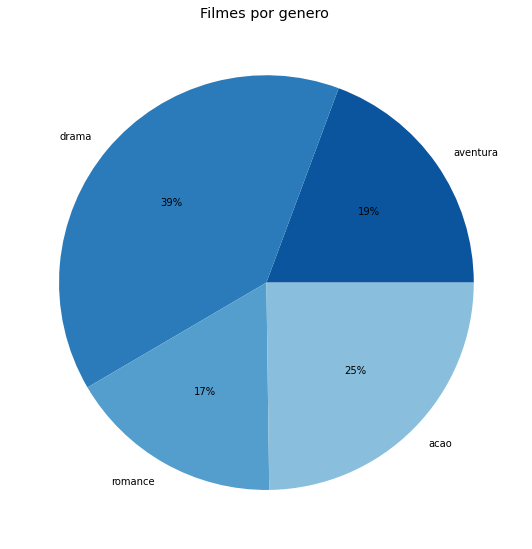

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

plt.rcParams["figure.figsize"] = (9,9)

#define data
data =    [aventura, drama, romance, acao] #f6.percent
labels = ['aventura', 'drama', 'romance', 'acao'] #, 'outros'] #df.rating

#define Seaborn color palette to use
colors = sns.color_palette('pastel')#[0:4]

colors = sns.color_palette("rocket")

colors = sns.color_palette("Blues_r") #, as_cmap=True)

#colors = 'Blues'



fig = plt.figure()

#ax = fig.add_axes([.8, .8, .8, .8], aspect=2)

ax = fig.add_axes([.8, .8, .8, .8], aspect=2)
ax.set_title('Filmes por genero ')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')


plt.show()

In [58]:
dfo = dffilmes.rating.value_counts()
dfo

4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64

In [59]:
type(dfo)

pandas.core.series.Series

In [60]:
df2 = dfo.to_frame().reset_index()
df2.columns = ['rating', 'quantidade']

In [61]:
df2

,rating,quantidade
0,4.0,5561926
1,3.0,4291193
2,5.0,2898660
3,3.5,2200156
4,4.5,1534824
5,2.0,1430997
6,2.5,883398
7,1.0,680732
8,1.5,279252
9,0.5,239125


In [62]:
df2['percent'] = df2['quantidade'] / df2['quantidade'].sum() * 100
df2

,rating,quantidade,percent
0,4.0,5561926,27.809264
1,3.0,4291193,21.455683
2,5.0,2898660,14.493109
3,3.5,2200156,11.000635
4,4.5,1534824,7.674019
5,2.0,1430997,7.154891
6,2.5,883398,4.416932
7,1.0,680732,3.403615
8,1.5,279252,1.396242
9,0.5,239125,1.195609


In [63]:
# formatar a saída

df3 = df2.style.format({
    "rating": "{:.1f}",
    "quantidade": "{:,d}",
    "percent": "{:.0f}"
})



df3

,rating,quantidade,percent
0,4.0,"5,561,926",28
1,3.0,"4,291,193",21
2,5.0,"2,898,660",14
3,3.5,"2,200,156",11
4,4.5,"1,534,824",8
5,2.0,"1,430,997",7
6,2.5,"883,398",4
7,1.0,"680,732",3
8,1.5,"279,252",1
9,0.5,"239,125",1


In [64]:
df4 = df2[ df2.percent >= 7]
df4

,rating,quantidade,percent
0,4.0,5561926,27.809264
1,3.0,4291193,21.455683
2,5.0,2898660,14.493109
3,3.5,2200156,11.000635
4,4.5,1534824,7.674019
5,2.0,1430997,7.154891


In [65]:
df4.percent.sum()

89.58760192303471

In [66]:
print('{:,d}'.format(df4.quantidade.sum()))

17,917,756


In [67]:
df5 = df2[ df2.percent < 7]
df5

,rating,quantidade,percent
6,2.5,883398,4.416932
7,1.0,680732,3.403615
8,1.5,279252,1.396242
9,0.5,239125,1.195609


In [68]:
print('{:,d}'.format(df5.quantidade.sum()))

2,082,507


In [69]:
df5.percent.sum()

10.412398076965287

In [70]:
df5

,rating,quantidade,percent
6,2.5,883398,4.416932
7,1.0,680732,3.403615
8,1.5,279252,1.396242
9,0.5,239125,1.195609


In [71]:
row = {'rating': 'outros', 'quantidade': df5.quantidade.sum(), 'percent': df5.percent.sum()  }
row

{'rating': 'outros', 'quantidade': 2082507, 'percent': 10.412398076965287}

In [72]:
df6 = df4.append(row, ignore_index=True)
df6

/var/folders/wm/w4f0z08s2jn7bhy010p8gtz40000gn/T/ipykernel_6411/3302498886.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df6 = df4.append(row, ignore_index=True)


,rating,quantidade,percent
0,4.0,5561926,27.809264
1,3.0,4291193,21.455683
2,5.0,2898660,14.493109
3,3.5,2200156,11.000635
4,4.5,1534824,7.674019
5,2.0,1430997,7.154891
6,outros,2082507,10.412398


In [73]:
# formatar a saída

dfs = df6.style.format({
    "rating": "{}",
    "quantidade": "{:,d}",
    "percent": "{:.0f}"
})

dfs

,rating,quantidade,percent
0,4.0,"5,561,926",28
1,3.0,"4,291,193",21
2,5.0,"2,898,660",14
3,3.5,"2,200,156",11
4,4.5,"1,534,824",8
5,2.0,"1,430,997",7
6,outros,"2,082,507",10


In [74]:
df6.to_csv('ratings_saida.csv', index=False)

In [75]:
!cat ratings_saida.csv

rating,quantidade,percent
4.0,5561926,27.80926430817435
3.0,4291193,21.45568285777042
5.0,2898660,14.493109415611185
3.5,2200156,11.000635341645257
4.5,1534824,7.67401908664901
2.0,1430997,7.1548909131844916
outros,2082507,10.412398076965287


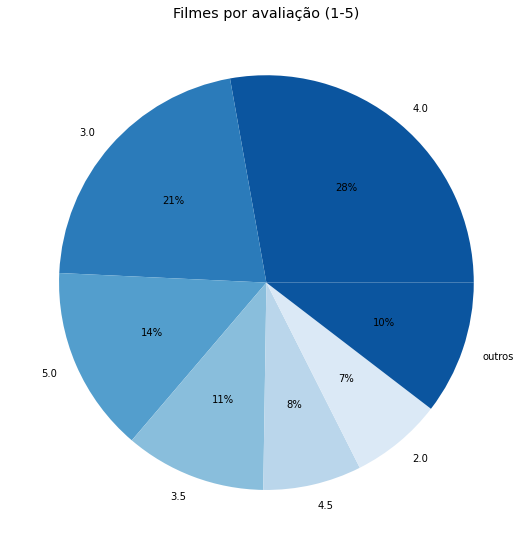

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (9,9)

#define data
data = df6.percent
labels = df6.rating

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:7]

colors = sns.color_palette("Blues_r")

colors = sns.color_palette("Reds_r")[0:7]

colors = sns.color_palette("Blues_r")[0:7]


colors = sns.color_palette("Oranges")[0:10]


colors = sns.color_palette("Blues_r")

fig = plt.figure()

ax = fig.add_axes([0, 0, .8, .8], aspect=1)

ax.set_title('Filmes por avaliação (1-5)')
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')


plt.show()

In [88]:
!ls -ilah /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m

total 5212696
8852112067 drwxr-xr-x@ 16 valencar  staff   512B Feb  3 04:05 .
8753341664 drwxr-xr-x@ 34 valencar  staff   1.1K Feb  5 13:52 ..
8852135013 -rw-r--r--@  1 valencar  staff   6.0K Dec 21 16:32 .DS_Store
8852112072 -rw-r--r--@  1 valencar  staff    10K Oct 17  2016 README.txt
8852115885 -rw-r--r--@  1 valencar  staff   1.1M Dec 20 17:50 filmes-ratings.csv
8860047286 -rw-r--r--@  1 valencar  staff   277M Feb  3 01:59 filmes.pbix
8852133601 -rw-r--r--@  1 valencar  staff    46K Dec 20 21:38 filmes2.csv
8859960005 -rw-r-----@  1 valencar  staff   1.1G Dec 20 22:20 filmes4.csv
8852142504 -rw-r--r--@  1 valencar  staff   287M Dec 21 05:20 filmes4.csv.zip
8852112073 -rw-r--r--@  1 valencar  staff   309M Oct 17  2016 genome-scores.csv
8852112070 -rw-r--r--@  1 valencar  staff    18K Oct 17  2016 genome-tags.csv
8852112068 -rw-r--r--@  1 valencar  staff   557K Oct 17  2016 links.csv
8852445227 -rw-r--r--@  1 valencar  staff   2.3K Dec 24 23:22 ml-20m.sql
8852112074 -rw-r--r--@  1 va

In [91]:
!head /Users/valencar/Dropbox/AULAS-REMOTAS/BD-ESTATISTICA-MANHA/datasets/ml-20m/tags.csv

# mapa

In [ ]:
!pip install plotly==5.5.0

# covid19

In [193]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-04-2022.csv'
url


'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/02-04-2022.csv'

In [194]:
df = pd.read_csv(url)
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2022-02-05 04:21:05,33.93911,67.709953,165358,7420,NaN,NaN,Afghanistan,424.775358,4.487234
1,NaN,NaN,NaN,Albania,2022-02-05 04:21:05,41.15330,20.168300,263172,3371,NaN,NaN,Albania,9144.902356,1.280911
2,NaN,NaN,NaN,Algeria,2022-02-05 04:21:05,28.03390,1.659600,256806,6631,NaN,NaN,Algeria,585.632593,2.582105
3,NaN,NaN,NaN,Andorra,2022-02-05 04:21:05,42.50630,1.521800,36599,147,NaN,NaN,Andorra,47368.148580,0.401650
4,NaN,NaN,NaN,Angola,2022-02-05 04:21:05,-11.20270,17.873900,98340,1896,NaN,NaN,Angola,299.212554,1.928005


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4006 entries, 0 to 4005
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3268 non-null   float64
 1   Admin2               3272 non-null   object 
 2   Province_State       3832 non-null   object 
 3   Country_Region       4006 non-null   object 
 4   Last_Update          4006 non-null   object 
 5   Lat                  3916 non-null   float64
 6   Long_                3916 non-null   float64
 7   Confirmed            4006 non-null   int64  
 8   Deaths               4006 non-null   int64  
 9   Recovered            0 non-null      float64
 10  Active               0 non-null      float64
 11  Combined_Key         4006 non-null   object 
 12  Incident_Rate        3915 non-null   float64
 13  Case_Fatality_Ratio  3967 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 438.3+ KB


In [196]:
df.loc[0, 'Province_State']

nan

In [197]:
df2 = df.groupby('Country_Region').sum().reset_index()
df2.head(30)

,Country_Region,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,0.0,33.939110,67.709953,165358,7420,0.0,0.0,424.775358,4.487234
1,Albania,0.0,41.153300,20.168300,263172,3371,0.0,0.0,9144.902356,1.280911
2,Algeria,0.0,28.033900,1.659600,256806,6631,0.0,0.0,585.632593,2.582105
3,Andorra,0.0,42.506300,1.521800,36599,147,0.0,0.0,47368.148580,0.401650
4,Angola,0.0,-11.202700,17.873900,98340,1896,0.0,0.0,299.212554,1.928005
5,Antigua and Barbuda,0.0,17.060800,-61.796400,6732,127,0.0,0.0,6874.438363,1.886512
6,Argentina,0.0,-38.416100,-63.616700,8555379,122439,0.0,0.0,18929.598223,1.431135
7,Armenia,0.0,40.069100,45.038200,383458,8075,0.0,0.0,12940.523766,2.105837
8,Australia,0.0,-256.850200,1130.843900,2704275,4154,0.0,0.0,67032.187595,1.226658
9,Austria,0.0,47.516200,14.550100,1995346,14192,0.0,0.0,22154.756618,0.711255


In [198]:
len(df2)

196

In [177]:
# import numpy as np


# # Só capturar os países (sem estatísticas detalhadas de estados)
# province_state = [True if str(x) == 'nan' else False for x in df['Province_State']  ]

# print(len(df))
# df2 = df[ province_state ]
# print(len(df2))
# df2.head()

In [179]:
#province_state 

In [199]:
url = 'https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv'
df3codes = pd.read_csv(url)
df3codes.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [200]:
dfmap = pd.merge(df2, df3codes, left_on='Country_Region', right_on='name', how='inner')
print(len(dfmap))
dfmap.head()

172


,Country_Region,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,0.0,33.93911,67.709953,165358,7420,0.0,0.0,424.775358,4.487234,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Albania,0.0,41.15330,20.168300,263172,3371,0.0,0.0,9144.902356,1.280911,...,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
2,Algeria,0.0,28.03390,1.659600,256806,6631,0.0,0.0,585.632593,2.582105,...,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
3,Andorra,0.0,42.50630,1.521800,36599,147,0.0,0.0,47368.148580,0.401650,...,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
4,Angola,0.0,-11.20270,17.873900,98340,1896,0.0,0.0,299.212554,1.928005,...,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0


In [201]:
dfmap.columns

Index(['Country_Region', 'FIPS', 'Lat', 'Long_', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Incident_Rate', 'Case_Fatality_Ratio', 'name',
       'alpha-2', 'alpha-3', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'],
      dtype='object')

In [202]:
dfmap.Country_Region.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana',
       'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', '

In [191]:
dfmap.Country_Region.value_counts()

Afghanistan    1
Oman           1
Nepal          1
Netherlands    1
New Zealand    1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zimbabwe       1
Name: Country_Region, Length: 172, dtype: int64

In [214]:
import plotly.graph_objects as go
import pandas as pd


fig = go.Figure(data=go.Choropleth(
    locations = dfmap['alpha-3'],
    z = dfmap['Confirmed'],
    text = dfmap['Country_Region'],
    colorscale = 'Reds',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_tickprefix = '',
    colorbar_title = 'Casos Confirmados',
))

fig.update_layout(
    title_text='Covid19 - 4/fevereiro/2022 - Casos Confirmados',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [
    ]
)

fig.show()

In [204]:
dfmap.head()

,Country_Region,FIPS,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio,...,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,0.0,33.93911,67.709953,165358,7420,0.0,0.0,424.775358,4.487234,...,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Albania,0.0,41.15330,20.168300,263172,3371,0.0,0.0,9144.902356,1.280911,...,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
2,Algeria,0.0,28.03390,1.659600,256806,6631,0.0,0.0,585.632593,2.582105,...,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
3,Andorra,0.0,42.50630,1.521800,36599,147,0.0,0.0,47368.148580,0.401650,...,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,NaN,150.0,39.0,NaN
4,Angola,0.0,-11.20270,17.873900,98340,1896,0.0,0.0,299.212554,1.928005,...,AO,AGO,24,ISO 3166-2:AO,Africa,Sub-Saharan Africa,Middle Africa,2.0,202.0,17.0


In [211]:
dfmap.to_csv('mapa_mundo_covid19-4-fevereiro-2022.csv')
!ls -ilah m*.csv

8860071197 -rw-r--r--@ 1 valencar  staff   2.7M Feb  1 12:36 mapa_covid_brasil.csv
8860206773 -rw-r--r--  1 valencar  staff    29K Feb  6 00:16 mapa_mundo_covid19-4-fevereiro-2022.csv


In [212]:
!pwd

/Users/valencar/Dropbox/AULAS-REMOTAS/Alunos-UEPB-TopicosEspeciaisEmBancoDeDados/Python-Para-Analise-de-Dados/NOITE


# Séries Teporais - Pandas

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv

In [247]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
url

'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [248]:
import pandas as pd

#s = pd.Series(url,index=[100,101,102,103])

df = pd.read_csv(url)
print(len(df))
df.head()

280


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


In [249]:
df2 = df.T
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australian Capital Territory,New South Wales,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Lat,33.93911,41.1533,28.0339,42.5063,-11.2027,17.0608,-38.4161,40.0691,-35.4735,-33.8688,...,55.3781,-32.5228,41.377491,-15.3767,6.4238,14.058324,31.9522,15.552727,-13.133897,-19.015438
Long,67.709953,20.1683,1.6596,1.5218,17.8739,-61.7964,-63.6167,45.0382,149.0124,151.2093,...,-3.436,-55.7658,64.585262,166.9592,-66.5897,108.277199,35.2332,48.516388,27.849332,29.154857
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [272]:
datas_s = list(df.columns[4:])
print(len(datas_s))
datas_s[:5]

746


['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20']

In [372]:
# convertar a string para o formato data

datas = pd.to_datetime(datas_s)
datas[:10]

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq=None)

In [252]:
datas[:-5]

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2022-01-22', '2022-01-23', '2022-01-24', '2022-01-25',
               '2022-01-26', '2022-01-27', '2022-01-28', '2022-01-29',
               '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', length=741, freq=None)

In [318]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


## convertendo as string para DATAS

In [370]:
datas_str = list(df.columns[4:])
datas_str[:10]

['1/22/20',
 '1/23/20',
 '1/24/20',
 '1/25/20',
 '1/26/20',
 '1/27/20',
 '1/28/20',
 '1/29/20',
 '1/30/20',
 '1/31/20']

In [371]:
from datetime import datetime
# str = '01,01,2017'
# datetime_value = dt.datetime.strptime(str,'%d,%m,%Y')
# print(datetime_value)


# from datetime import datetime
datas = []
    
formato = "%m/%d/%Y %H:%M:%S"  
formato = "%m/%d/%Y"  
for col in datas_str:
    print(col)
    
    #datad = str(col + " 00:00:00")
    #print(datad)
    #datad = datetime.strptime(datad, formato)
    
    datad = pd.to_datetime(col, formato)
    print(datad)
    datas.append(datad)
    
print(datas[:10])

1/22/20


AssertionError: 

In [373]:
df2.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


In [393]:
cols = list(df2.columns[4:])
cols[:3]

['1/22/20', '1/23/20', '1/24/20']

In [392]:
datas2 = list(datas)
datas2[:3]

[Timestamp('2020-01-22 00:00:00'),
 Timestamp('2020-01-23 00:00:00'),
 Timestamp('2020-01-24 00:00:00')]

In [396]:
df2 = df.copy()

for col, data in zip(list(df.columns[4:]), datas2):
    print(col, data)
    date_time = datetime.strftime(data, "%Y-%m-%d")
    print(date_time)
    df2.rename(columns={ col: date_time}, inplace = True)

df2.head()

1/22/20 2020-01-22 00:00:00
2020-01-22
1/23/20 2020-01-23 00:00:00
2020-01-23
1/24/20 2020-01-24 00:00:00
2020-01-24
1/25/20 2020-01-25 00:00:00
2020-01-25
1/26/20 2020-01-26 00:00:00
2020-01-26
1/27/20 2020-01-27 00:00:00
2020-01-27
1/28/20 2020-01-28 00:00:00
2020-01-28
1/29/20 2020-01-29 00:00:00
2020-01-29
1/30/20 2020-01-30 00:00:00
2020-01-30
1/31/20 2020-01-31 00:00:00
2020-01-31
2/1/20 2020-02-01 00:00:00
2020-02-01
2/2/20 2020-02-02 00:00:00
2020-02-02
2/3/20 2020-02-03 00:00:00
2020-02-03
2/4/20 2020-02-04 00:00:00
2020-02-04
2/5/20 2020-02-05 00:00:00
2020-02-05
2/6/20 2020-02-06 00:00:00
2020-02-06
2/7/20 2020-02-07 00:00:00
2020-02-07
2/8/20 2020-02-08 00:00:00
2020-02-08
2/9/20 2020-02-09 00:00:00
2020-02-09
2/10/20 2020-02-10 00:00:00
2020-02-10
2/11/20 2020-02-11 00:00:00
2020-02-11
2/12/20 2020-02-12 00:00:00
2020-02-12
2/13/20 2020-02-13 00:00:00
2020-02-13
2/14/20 2020-02-14 00:00:00
2020-02-14
2/15/20 2020-02-15 00:00:00
2020-02-15
2/16/20 2020-02-16 00:00:00
2020-0

2020-09-23
9/24/20 2020-09-24 00:00:00
2020-09-24
9/25/20 2020-09-25 00:00:00
2020-09-25
9/26/20 2020-09-26 00:00:00
2020-09-26
9/27/20 2020-09-27 00:00:00
2020-09-27
9/28/20 2020-09-28 00:00:00
2020-09-28
9/29/20 2020-09-29 00:00:00
2020-09-29
9/30/20 2020-09-30 00:00:00
2020-09-30
10/1/20 2020-10-01 00:00:00
2020-10-01
10/2/20 2020-10-02 00:00:00
2020-10-02
10/3/20 2020-10-03 00:00:00
2020-10-03
10/4/20 2020-10-04 00:00:00
2020-10-04
10/5/20 2020-10-05 00:00:00
2020-10-05
10/6/20 2020-10-06 00:00:00
2020-10-06
10/7/20 2020-10-07 00:00:00
2020-10-07
10/8/20 2020-10-08 00:00:00
2020-10-08
10/9/20 2020-10-09 00:00:00
2020-10-09
10/10/20 2020-10-10 00:00:00
2020-10-10
10/11/20 2020-10-11 00:00:00
2020-10-11
10/12/20 2020-10-12 00:00:00
2020-10-12
10/13/20 2020-10-13 00:00:00
2020-10-13
10/14/20 2020-10-14 00:00:00
2020-10-14
10/15/20 2020-10-15 00:00:00
2020-10-15
10/16/20 2020-10-16 00:00:00
2020-10-16
10/17/20 2020-10-17 00:00:00
2020-10-17
10/18/20 2020-10-18 00:00:00
2020-10-18
10/19

8/27/21 2021-08-27 00:00:00
2021-08-27
8/28/21 2021-08-28 00:00:00
2021-08-28
8/29/21 2021-08-29 00:00:00
2021-08-29
8/30/21 2021-08-30 00:00:00
2021-08-30
8/31/21 2021-08-31 00:00:00
2021-08-31
9/1/21 2021-09-01 00:00:00
2021-09-01
9/2/21 2021-09-02 00:00:00
2021-09-02
9/3/21 2021-09-03 00:00:00
2021-09-03
9/4/21 2021-09-04 00:00:00
2021-09-04
9/5/21 2021-09-05 00:00:00
2021-09-05
9/6/21 2021-09-06 00:00:00
2021-09-06
9/7/21 2021-09-07 00:00:00
2021-09-07
9/8/21 2021-09-08 00:00:00
2021-09-08
9/9/21 2021-09-09 00:00:00
2021-09-09
9/10/21 2021-09-10 00:00:00
2021-09-10
9/11/21 2021-09-11 00:00:00
2021-09-11
9/12/21 2021-09-12 00:00:00
2021-09-12
9/13/21 2021-09-13 00:00:00
2021-09-13
9/14/21 2021-09-14 00:00:00
2021-09-14
9/15/21 2021-09-15 00:00:00
2021-09-15
9/16/21 2021-09-16 00:00:00
2021-09-16
9/17/21 2021-09-17 00:00:00
2021-09-17
9/18/21 2021-09-18 00:00:00
2021-09-18
9/19/21 2021-09-19 00:00:00
2021-09-19
9/20/21 2021-09-20 00:00:00
2021-09-20
9/21/21 2021-09-21 00:00:00
2021-0

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


In [397]:
df2.head()

,Province/State,Country/Region,Lat,Long,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2022-01-27,2022-01-28,2022-01-29,2022-01-30,2022-01-31,2022-02-01,2022-02-02,2022-02-03,2022-02-04,2022-02-05
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351


In [347]:
dft = df.T[4:]
print(len(dft))
dft.head()

746


,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,2,0,0,0,0


In [348]:
dfd = df[ df.columns[:4]]
print(len(dfd))
dfd.head()

280


,Province/State,Country/Region,Lat,Long
0,NaN,Afghanistan,33.93911,67.709953
1,NaN,Albania,41.15330,20.168300
2,NaN,Algeria,28.03390,1.659600
3,NaN,Andorra,42.50630,1.521800
4,NaN,Angola,-11.20270,17.873900


In [331]:
dfdatas = pd.DataFrame(index=datas)
print(len(dfdatas))
dfdatas.head()

746


""
2020-01-22
2020-01-23
2020-01-24
2020-01-25
2020-01-26


In [343]:
dfts = pd.concat(dfdatas, df.T[4:])

/var/folders/wm/w4f0z08s2jn7bhy010p8gtz40000gn/T/ipykernel_6411/4163437551.py:1: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.



TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

In [341]:
cols = list(df.T[4:].columns)
cols

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [342]:
dfdatas[ cols ] = df.T[4:].values()
dfdatas.head()

TypeError: 'numpy.ndarray' object is not callable

In [327]:
# adicionar a o dados pais, cidades, ocorrencias na cidade

for index, row in df.iterrows(): 
    print(row)
    print(index)
    print(type(row))
    dfdatas.at[index] = row
    
    break
    
dfdatas.head()

Province/State            NaN
Country/Region    Afghanistan
Lat                  33.93911
Long                67.709953
1/22/20                     0
                     ...     
2/1/22                 163555
2/2/22                 164190
2/3/22                 164727
2/4/22                 165358
2/5/22                 165711
Name: 0, Length: 750, dtype: object
0
<class 'pandas.core.series.Series'>


ValueError: Must have equal len keys and value when setting with an iterable

In [319]:
dfdatas = df.loc[:, datas_s].T
dfdatas.head()

,0,1,2,3,4,5,6,7,8,9,...,270,271,272,273,274,275,276,277,278,279
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,2,0,0,0,0


In [315]:
atribs = list(df.columns[:4])
atribs

['Province/State', 'Country/Region', 'Lat', 'Long']

In [322]:
dfdatas2[ atribs ] = df[ atribs ]
dfdatas2.head()

,0,1,2,3,4,5,6,7,8,9,...,274,275,276,277,278,279,Province/State,Country/Region,Lat,Long
1/22/20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1/23/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,NaN,NaN,NaN,NaN
1/24/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,NaN,NaN,NaN,NaN
1/25/20,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,NaN,NaN,NaN,NaN
1/26/20,0,0,0,0,0,0,0,0,0,3,...,0,2,0,0,0,0,NaN,NaN,NaN,NaN


In [320]:
dfdatas2 = dfdatas.copy()

for atrib in atribs:
    dfdatas2[ atrib ] = df[ atrib ]
    

dfdatas2.head(10)

ValueError: Length of values (280) does not match length of index (746)

In [295]:
dfdatas.columns

RangeIndex(start=0, stop=280, step=1)

In [296]:
df.columns[4:]

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '1/27/22', '1/28/22', '1/29/22', '1/30/22', '1/31/22', '2/1/22',
       '2/2/22', '2/3/22', '2/4/22', '2/5/22'],
      dtype='object', length=746)

In [294]:
dfdatas.columns = df.columns[4:]
dfdatas[:4]

ValueError: Length mismatch: Expected axis has 280 elements, new values have 746 elements

In [263]:
atributos

['Province/State', 'Country/Region', 'Lat', 'Long']

In [264]:
datas[:10]

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31'],
              dtype='datetime64[ns]', freq=None)

In [269]:
len(df), len(datas)

(280, 746)

In [287]:
dfts = pd.DataFrame(data=df[4:].values, index=df.columns[4:])
dfts.head(10)

ValueError: Shape of passed values is (276, 750), indices imply (746, 750)

In [257]:
atributos = ['Province/State', 'Country/Region', 'Lat', 'Long']
atributos

['Province/State', 'Country/Region', 'Lat', 'Long']

In [258]:
dfm = df[ atributos ]
print(len(dfm2))
dfm.head(10)

280


,Province/State,Country/Region,Lat,Long
0,NaN,Afghanistan,33.93911,67.709953
1,NaN,Albania,41.15330,20.168300
2,NaN,Algeria,28.03390,1.659600
3,NaN,Andorra,42.50630,1.521800
4,NaN,Angola,-11.20270,17.873900
5,NaN,Antigua and Barbuda,17.06080,-61.796400
6,NaN,Argentina,-38.41610,-63.616700
7,NaN,Armenia,40.06910,45.038200
8,Australian Capital Territory,Australia,-35.47350,149.012400
9,New South Wales,Australia,-33.86880,151.209300


In [259]:
s = pd.Series(data=dfm.values,index=datas) #, columns = atributos )
s.head()

ValueError: Length of values (280) does not match length of index (746)

In [ ]:
# somar os países com métricas de estado

dfm = df.groupby('Country/Region').sum().reset_index()
print(len(dfm))
dfm.head(30)